In [1]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pandas as pd
import numpy as np

In [2]:
import tensorflow as tf

# Data preperation

In [41]:
df = pd.read_csv('Weather data Nmap.csv',sep=',', usecols=[0,1,2])
df.index = pd.to_datetime(df['Time'],dayfirst=True) 
df.drop(['Time'], axis=1, inplace=True)
df['Value GHI']=pd.to_numeric(df['Value GHI'],errors='coerce')
df['Value DNI']=pd.to_numeric(df['Value DNI'],errors='coerce')
df.head()

C:\Users\zhu\AppData\Local\Temp\ipykernel_68976\4268537689.py:1: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Weather data Nmap.csv',sep=',', usecols=[0,1,2])


,Value GHI,Value DNI
Time,,
1990-01-01 00:00:00,650.0,202.0
1990-01-01 01:00:00,561.0,48.0
1990-01-01 02:00:00,1031.0,538.0
1990-01-01 03:00:00,579.0,60.0
1990-01-01 04:00:00,378.0,26.0


In [42]:
#Only use 2001
df=df['2001-01-01':'2015-12-31']
df.head()

,Value GHI,Value DNI
Time,,
2001-01-01 00:00:00,934.0,911.0
2001-01-01 01:00:00,1019.0,881.0
2001-01-01 02:00:00,1000.0,767.0
2001-01-01 03:00:00,NaN,NaN
2001-01-01 04:00:00,925.0,837.0


In [43]:
df['Value GHI'].max()

1213.0

## Wind data

In [5]:
df1=pd.read_csv('BOM observation.csv',sep=',', usecols=[32,26,14])
#df1=pd.read_csv('BOM observation.csv',sep=',', usecols=[32,14,26,28,71])
df1.head()

C:\Users\zhu\AppData\Local\Temp\ipykernel_68976\1948095939.py:1: DtypeWarning: Columns (14,26) have mixed types. Specify dtype option on import or set low_memory=False.
  df1=pd.read_csv('BOM observation.csv',sep=',', usecols=[32,26,14])


,Air Temperature in degrees C,Wind speed in km/h,Time
0,29.1,7.6,1/01/2011 1:30
1,,,1/01/2011 2:00
2,28.8,7.6,1/01/2011 2:30
3,,,1/01/2011 3:00
4,26.3,1.8,1/01/2011 3:30


In [6]:
df1.index = pd.to_datetime(df1['Time'],dayfirst=True) 
df1.drop(['Time'], axis=1, inplace=True)
df1.columns = ['temp','wind speed']
#df1.columns = ['temp','wind speed','wind direction','pressure' ]
df1['temp']=pd.to_numeric(df1['temp'],errors='coerce')
df1['wind speed']=pd.to_numeric(df1['wind speed'],errors='coerce')
#df1['wind direction']=pd.to_numeric(df1['wind direction'],errors='coerce')
#df1['pressure']=pd.to_numeric(df1['pressure'],errors='coerce')
df1.head()

,temp,wind speed
Time,,
2011-01-01 01:30:00,29.1,7.6
2011-01-01 02:00:00,NaN,NaN
2011-01-01 02:30:00,28.8,7.6
2011-01-01 03:00:00,NaN,NaN
2011-01-01 03:30:00,26.3,1.8


In [7]:
df1.interpolate(method='linear', inplace=True)
df1.isnull().sum()

temp          0
wind speed    0
dtype: int64

In [8]:
df1 = df1.resample('H').mean()
df1.head()

,temp,wind speed
Time,,
2011-01-01 00:00:00,32.175,24.925
2011-01-01 01:00:00,29.100,7.600
2011-01-01 02:00:00,28.875,7.600
2011-01-01 03:00:00,26.925,3.250
2011-01-01 04:00:00,27.350,8.850


In [9]:
df1.to_csv('../code/wind data.csv')

In [10]:
df1=df1['2011-01-01':'2015-12-31']
df1

,temp,wind speed
Time,,
2011-01-01 00:00:00,32.175,24.925
2011-01-01 01:00:00,29.100,7.600
2011-01-01 02:00:00,28.875,7.600
2011-01-01 03:00:00,26.925,3.250
2011-01-01 04:00:00,27.350,8.850
...,...,...
2015-12-31 19:00:00,30.800,17.650
2015-12-31 20:00:00,26.100,30.400
2015-12-31 21:00:00,24.600,16.750


In [11]:
df['temp']=df1['temp'].values
df['wind speed']=df1['wind speed'].values
df = df.drop(['temp'], axis=1)
df.head()

,Value GHI,Value DNI,wind speed
Time,,,
2011-01-01 00:00:00,969.0,1003.0,24.925
2011-01-01 01:00:00,1065.0,996.0,7.600
2011-01-01 02:00:00,1089.0,970.0,7.600
2011-01-01 03:00:00,1064.0,1002.0,3.250
2011-01-01 04:00:00,967.0,968.0,8.850


## Fill NAN

In [15]:
df.dtypes

Value GHI     float64
Value DNI     float64
wind speed    float64
dtype: object

In [16]:
df.isnull().sum()

Value GHI     187
Value DNI     187
wind speed     10
dtype: int64

In [17]:
df.interpolate(method='linear', inplace=True)
df.isnull().sum()

Value GHI     0
Value DNI     0
wind speed    0
dtype: int64

In [18]:
df['Value GHI'].mean()

234.55953358890105

In [19]:
df['Value GHI'].max()

1197.0

In [20]:
df['Value GHI'].min()

0.0

## Data Splitting

In [29]:
train_df = df['2011-01-01':'2013-12-31']
val_df = df['2014-01-01':'2014-12-31'] 
test_df = df['2015-01-01':'2015-12-31']

In [30]:
train_df['Value GHI'].mean()

232.3078429136253

In [31]:
train_df['Value GHI'].min()

0.0

In [32]:
train_df['Value GHI'].max()

1197.0

In [22]:
train_df.to_csv('../code/train.csv')
val_df.to_csv('../code/val.csv')
test_df.to_csv('../code/test.csv')

In [33]:
# Data scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(train_df) 
train_df[train_df.columns] = scaler.transform(train_df[train_df.columns])
val_df[val_df.columns] = scaler.transform(val_df[val_df.columns])
test_df[test_df.columns] = scaler.transform(test_df[test_df.columns])
val_df.head()

C:\Users\zhu\AppData\Local\Temp\ipykernel_68976\3402492388.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df[train_df.columns] = scaler.transform(train_df[train_df.columns])
C:\Users\zhu\AppData\Local\Temp\ipykernel_68976\3402492388.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  val_df[val_df.columns] = scaler.transform(val_df[val_df.columns])
C:\Users\zhu\AppData\Local\Temp\ipykernel_68976\3402492388.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Data

,Value GHI,Value DNI,wind speed
Time,,,
2014-01-01 00:00:00,0.814536,0.874477,0.131148
2014-01-01 01:00:00,0.895572,0.871130,0.182543
2014-01-01 02:00:00,0.917293,0.855230,0.115197
2014-01-01 03:00:00,0.895572,0.876151,0.264953
2014-01-01 04:00:00,0.813701,0.881172,0.443066


In [34]:
train_df

,Value GHI,Value DNI,wind speed
Time,,,
2011-01-01 00:00:00,0.809524,0.839331,0.441737
2011-01-01 01:00:00,0.889724,0.833473,0.134692
2011-01-01 02:00:00,0.909774,0.811715,0.134692
2011-01-01 03:00:00,0.888889,0.838494,0.057599
2011-01-01 04:00:00,0.807853,0.810042,0.156845
...,...,...,...
2013-12-31 19:00:00,0.000000,0.000000,0.230394
2013-12-31 20:00:00,0.127820,0.458577,0.262295
2013-12-31 21:00:00,0.323308,0.717992,0.395215


In [35]:
val_df

,Value GHI,Value DNI,wind speed
Time,,,
2014-01-01 00:00:00,0.814536,0.874477,0.131148
2014-01-01 01:00:00,0.895572,0.871130,0.182543
2014-01-01 02:00:00,0.917293,0.855230,0.115197
2014-01-01 03:00:00,0.895572,0.876151,0.264953
2014-01-01 04:00:00,0.813701,0.881172,0.443066
...,...,...,...
2014-12-31 19:00:00,0.000000,0.000000,0.363314
2014-12-31 20:00:00,0.132832,0.510460,0.363314
2014-12-31 21:00:00,0.331662,0.753975,0.278245


In [36]:
train_df['Value GHI'].mean()

0.19407505673652906

In [37]:
train_df['Value GHI'].min()

0.0

In [38]:
train_df['Value GHI'].max()

1.0

# Data Windowing

In [57]:
class DataWindow():
    # Defining the initialization function of DataWindow
    def __init__(self, input_width, label_width, shift, 
                 train_df=train_df, val_df=val_df, test_df=test_df, 
                 label_columns=None):
 
        self.train_df = train_df
        self.val_df = val_df
        self.test_df = test_df
 
        self.label_columns = label_columns 
        if label_columns is not None:
            self.label_columns_indices = {name: i for i, name in 
     enumerate(label_columns)} 
            self.column_indices = {name: i for i, name in 
     enumerate(train_df.columns)} 
 
            self.input_width = input_width
            self.label_width = label_width
            self.shift = shift
 
            self.total_window_size = input_width + shift
 
            self.input_slice = slice(0, input_width) 
            self.input_indices = np.arange(self.total_window_size)[self.input_slice] 
 
            self.label_start = self.total_window_size - self.label_width 
            self.labels_slice = slice(self.label_start, None) 
            self.label_indices = np.arange(self.total_window_size)[self.labels_slice]
         
    # Slice the window to get the labels
    def split_to_inputs_labels(self, features):
        inputs = features[:, self.input_slice, :] 
        labels = features[:, self.labels_slice, :] 
        if self.label_columns is not None: 
            labels = tf.stack([labels[:,:,self.column_indices[name]] for name in 
            self.label_columns],
                        axis=-1
                         )
        inputs.set_shape([None, self.input_width, None]) 
        labels.set_shape([None, self.label_width, None])
 
        return inputs, labels
            
    # Method to plot a sample of data windows
    def plot(self, model=None, plot_col='Value DNI', max_subplots=3):
        inputs, labels = self.sample_batch
 
        plt.figure(figsize=(12, 8))
        plot_col_index = self.column_indices[plot_col]
        max_n = min(max_subplots, len(inputs))
 
        for n in range(max_n):
            plt.subplot(3, 1, n+1)
            plt.ylabel(f'{plot_col} [scaled]')
            plt.plot(self.input_indices, inputs[n, :, plot_col_index],
                     label='Inputs', marker='.', zorder=-10) 
            
            if self.label_columns:
                label_col_index = self.label_columns_indices.get(plot_col,None)
            else:
                label_col_index = plot_col_index
                
            if label_col_index is None:
                continue
                
            plt.scatter(self.label_indices, labels[n, :, label_col_index],
                        edgecolors='k', marker='s', label='Labels', 
    c='green', s=64) 
            if model is not None:
                predictions = model(inputs)
                plt.scatter(self.label_indices, predictions[n, :, 
    label_col_index],
                       marker='X', edgecolors='k', label='Predictions',
                       c='red', s=64) 
            if n == 0:
                plt.legend()
                
        plt.xlabel('Time (h)')
    # Create dataset
    def make_dataset(self, data):
        data = np.array(data, dtype=np.float32)
        ds = tf.keras.preprocessing.timeseries_dataset_from_array(
             data=data,
             targets=None,
             sequence_length=self.total_window_size,
             sequence_stride=1,
             shuffle=True,   
             batch_size=32
        )
        ds = ds.map(self.split_to_inputs_labels)
        return ds
 
    @property
    def train(self):
        return self.make_dataset(self.train_df)
 
    @property
    def val(self):
        return self.make_dataset(self.val_df)

    @property
    def test(self):
        return self.make_dataset(self.test_df)
 
    @property
    def sample_batch(self):
        result = getattr(self, '_sample_batch', None)
        if result is None:
            result = next(iter(self.train))
            self._sample_batch = result
        return result

## Compile and fit

In [58]:
from keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import RMSprop

def compile_and_fit(model, window, patience=3, max_epochs=50): 
    early_stopping = EarlyStopping(monitor='val_loss', 
                                   patience=patience, 
                                   mode='min')
 
    model.compile(loss=MeanSquaredError(), 
                  optimizer=RMSprop(),
                  metrics=[RootMeanSquaredError()]) 
 
    history = model.fit(window.train, 
                        epochs=max_epochs, 
                        validation_data=window.val, 
                        callbacks=[early_stopping]) 
 
    return history


# Model Building

In [59]:
from tensorflow.keras.models import Model
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import MeanAbsoluteError
from tensorflow.keras.metrics import MeanAbsolutePercentageError
from tensorflow.keras.metrics import RootMeanSquaredError 

In [60]:
six_step_window = DataWindow(input_width=3, label_width=1, shift=1, 
label_columns=['Value DNI'])

## Single step baseline

In [61]:
single_step_window = DataWindow(input_width=1, label_width=9, shift=1, 
label_columns=['Value DNI'])

wide_window = DataWindow(input_width=24, label_width=24, shift=1, 
label_columns=['Value DNI'])

In [62]:
#Baseline Model
class Baseline(Model):
    def __init__(self, label_index=None):
        super().__init__()
        self.label_index = label_index
 
    def call(self, inputs):
        if self.label_index is None: 
            return inputs
 
        elif isinstance(self.label_index, list): 
            tensors = []
            for index in self.label_index:
                result = inputs[:, :, index]
                result = result[:, :, tf.newaxis]
                tensors.append(result)
            return tf.concat(tensors, axis=-1)
 
        result = inputs[:, :, self.label_index] 
        return result[:,:,tf.newaxis]

column_indices = {name: i for i, name in enumerate(train_df.columns)} 
baseline_last = Baseline(label_index=column_indices['Value DNI']) 
baseline_last.compile(loss=MeanSquaredError(), metrics=[RootMeanSquaredError()]) 


274/274 [==============================] - 1s 2ms/step - loss: 0.0568 - root_mean_squared_error: 0.2384


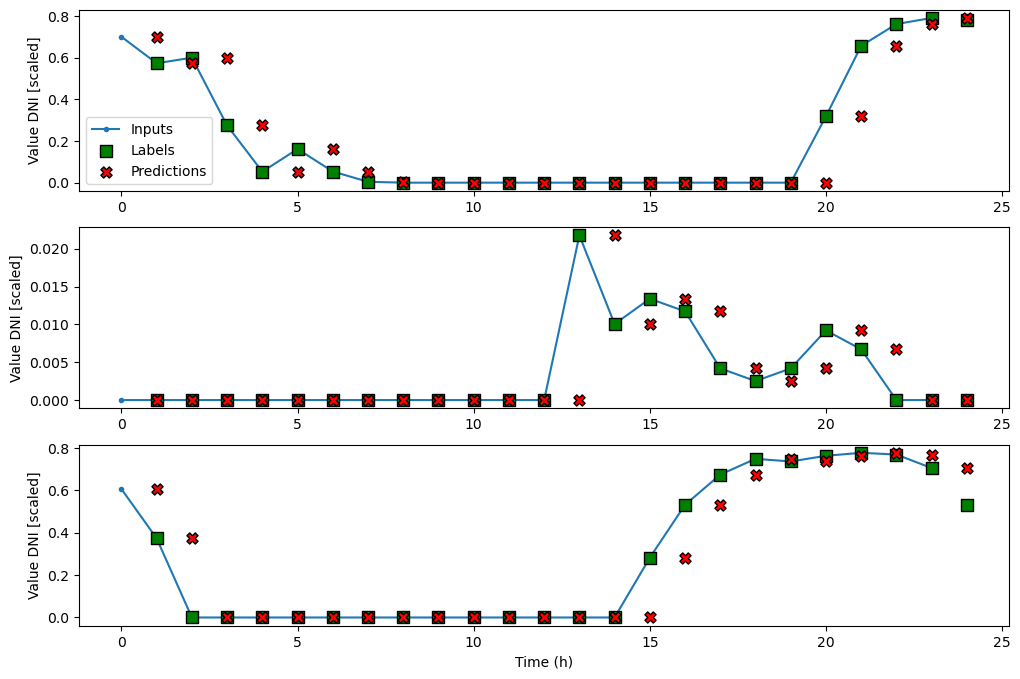

In [63]:
val_performance = {} 
performance = {} 
val_performance['Baseline - Last'] = baseline_last.evaluate(six_step_window.val)
performance['Baseline - Last'] = baseline_last.evaluate(six_step_window.test, verbose=0)
wide_window.plot(baseline_last)

In [64]:
print(val_performance['Baseline - Last'])

[0.05681976303458214, 0.238368958234787]


In [65]:
print(performance['Baseline - Last'])

[0.055974919348955154, 0.2365902215242386]


In [31]:
test_df.mean()

Value GHI     0.198348
Value DNI     0.249101
wind speed    0.279558
dtype: float64

In [23]:
#GHI_ori=df['2014-01-01':'2015-12-31']['Value GHI'].mean()
#DNI_ori=df['2014-01-01':'2015-12-31']['Value DNI'].mean()
ws_ori=df['2022-01-01':'2022-12-28']['wind speed'].mean()
ws_ori

KeyError: 'wind speed'

## Multi step baseline

In [43]:
multi_window = DataWindow(input_width=24, label_width=24, shift=24, 
               label_columns=['Value GHI'])

class MultiStepLastBaseline(Model):
    def __init__(self, label_index=None):
        super().__init__()
        self.label_index = label_index
 
    def call(self, inputs):
        if self.label_index is None:
            return tf.tile(inputs[:, -1:, :], [1, 24, 1]) 
        return tf.tile(inputs[:, -1:, self.label_index:], [1, 24, 1])

821/821 [==============================] - 1s 1ms/step - loss: 0.1466 - mean_absolute_error: 0.2683


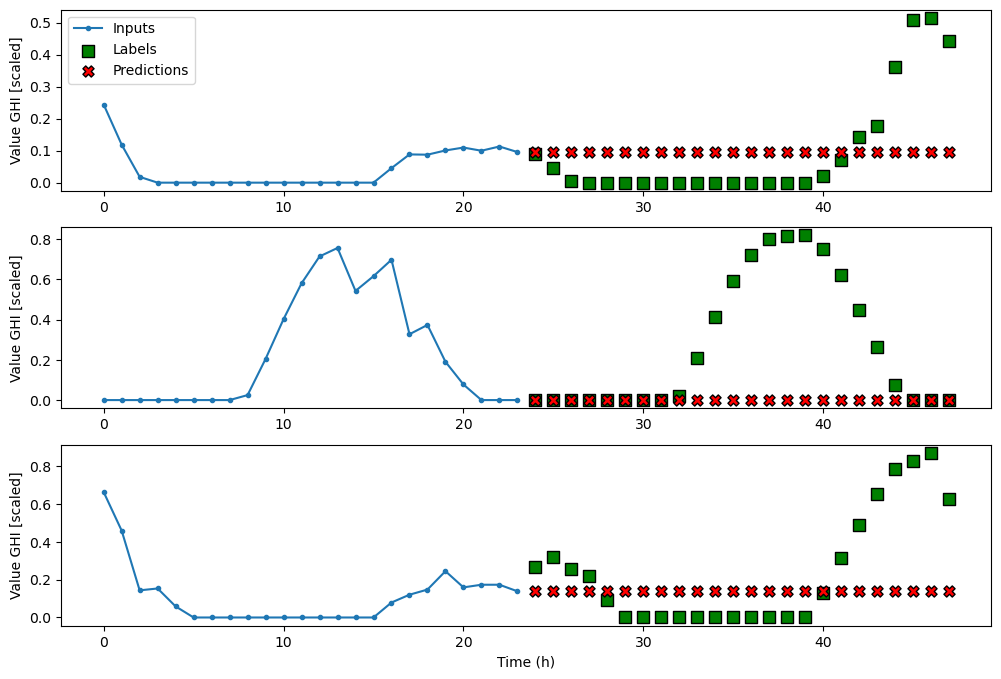

In [44]:
ms_baseline_last = MultiStepLastBaseline(label_index=column_indices['Value GHI'])
ms_baseline_last.compile(loss=MeanSquaredError(), metrics=[MeanAbsoluteError()])
ms_val_performance = {}
ms_performance = {}
ms_val_performance['Baseline - Last'] = ms_baseline_last.evaluate(multi_window.val)
ms_performance['Baseline - Last'] = ms_baseline_last.evaluate(multi_window.test, verbose=0)

multi_window.plot(ms_baseline_last)

In [45]:
print(ms_performance['Baseline - Last'])

[0.15360839664936066, 0.2756344676017761]


## Repeat baseline

In [162]:
class RepeatBaseline(Model):
    def __init__(self, label_index=None):
        super().__init__()
        self.label_index = label_index
 
    def call(self, inputs):
        return inputs[:, :, self.label_index:] 

821/821 [==============================] - 1s 1ms/step - loss: 0.0245 - mean_absolute_error: 0.0728


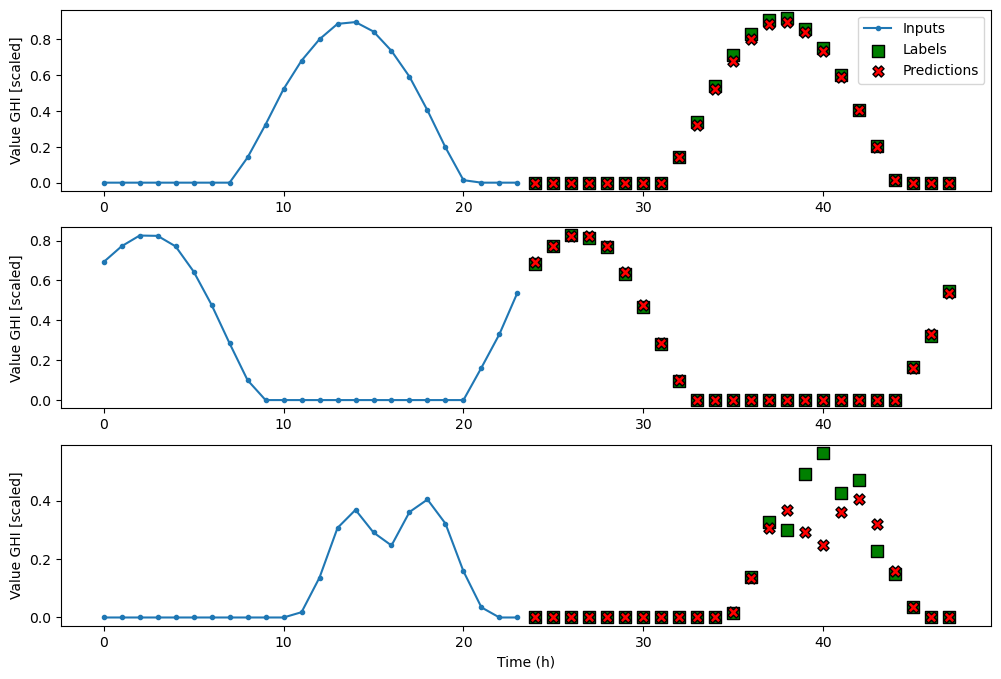

In [166]:
ms_baseline_repeat = RepeatBaseline(label_index=column_indices['Value GHI'])
ms_baseline_repeat.compile(loss=MeanSquaredError(), metrics=[MeanAbsoluteError()])
ms_val_performance['Baseline - Repeat'] = ms_baseline_repeat.evaluate(multi_window.val)
ms_performance['Baseline - Repeat'] = ms_baseline_repeat.evaluate(multi_window.test, verbose=0)

multi_window.plot(ms_baseline_repeat)

In [197]:
print(ms_performance['Baseline - Repeat'][1])
print(ms_performance['Baseline - Repeat'])

0.07026911526918411
[0.022913891822099686, 0.07026911526918411]


## Multi output baseline

In [186]:
mo_single_step_window = DataWindow(input_width=1, label_width=1, shift=1, label_columns=['Value GHI','Value GHI']) 
mo_wide_window = DataWindow(input_width=24, label_width=24, shift=1, label_columns=['Value GHI','Value GHI'])



0
1


In [188]:
class Baseline(Model):
    def __init__(self, label_index=None):
        super().__init__()
        self.label_index = label_index
 
    def call(self, inputs):
        if self.label_index is None: 
            return inputs
 
        elif isinstance(self.label_index, list): 
            tensors = []
            for index in self.label_index:
                result = inputs[:, :, index]
                result = result[:, :, tf.newaxis]
                tensors.append(result)
            return tf.concat(tensors, axis=-1)
        
        result = inputs[:, :, self.label_index] 
        return result[:,:,tf.newaxis]

In [189]:
print(column_indices['Value DNI']) 
print(column_indices['Value DNI']) 
mo_baseline_last = Baseline(label_index=[0, 1])

0
1


In [219]:
mo_val_performance = {}
mo_performance = {}
mo_baseline_last.compile(loss=MeanSquaredError(), metrics=[MeanAbsoluteError()])
mo_val_performance['Baseline - Last'] = mo_baseline_last.evaluate(mo_wide_window.val)
mo_performance['Baseline - Last'] = mo_baseline_last.evaluate(mo_wide_window.test, verbose=0)

822/822 [==============================] - 1s 938us/step - loss: 0.0306 - mean_absolute_error: 0.0975


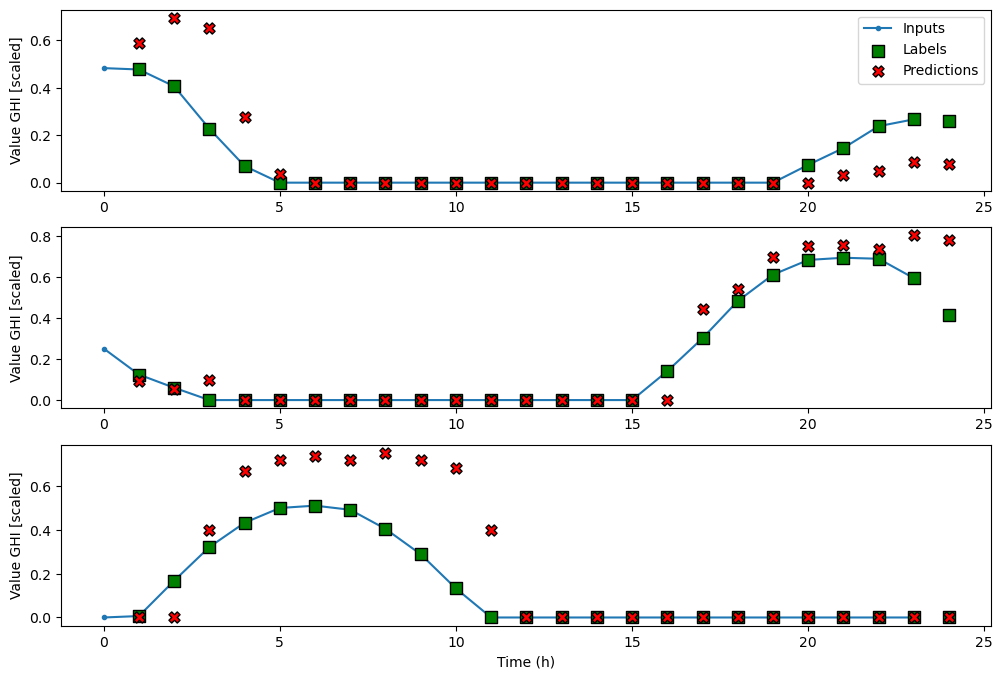

In [220]:
mo_wide_window.plot(mo_baseline_last)

In [221]:
print(mo_performance['Baseline - Last'])


[0.031442057341337204, 0.09886770695447922]


## Linear model

Epoch 1/50
822/822 [==============================] - 2s 1ms/step - loss: 0.4441 - root_mean_squared_error: 0.6664 - val_loss: 0.1898 - val_root_mean_squared_error: 0.4357
Epoch 2/50
822/822 [==============================] - 1s 1ms/step - loss: 0.0829 - root_mean_squared_error: 0.2880 - val_loss: 0.0488 - val_root_mean_squared_error: 0.2210
Epoch 3/50
822/822 [==============================] - 1s 1ms/step - loss: 0.0464 - root_mean_squared_error: 0.2155 - val_loss: 0.0487 - val_root_mean_squared_error: 0.2207
Epoch 4/50
822/822 [==============================] - 1s 1ms/step - loss: 0.0464 - root_mean_squared_error: 0.2154 - val_loss: 0.0487 - val_root_mean_squared_error: 0.2206
Epoch 5/50
822/822 [==============================] - 1s 1ms/step - loss: 0.0464 - root_mean_squared_error: 0.2154 - val_loss: 0.0487 - val_root_mean_squared_error: 0.2206
Epoch 6/50
822/822 [==============================] - 1s 1ms/step - loss: 0.0464 - root_mean_squared_error: 0.2154 - val_loss: 0.0487 - val_

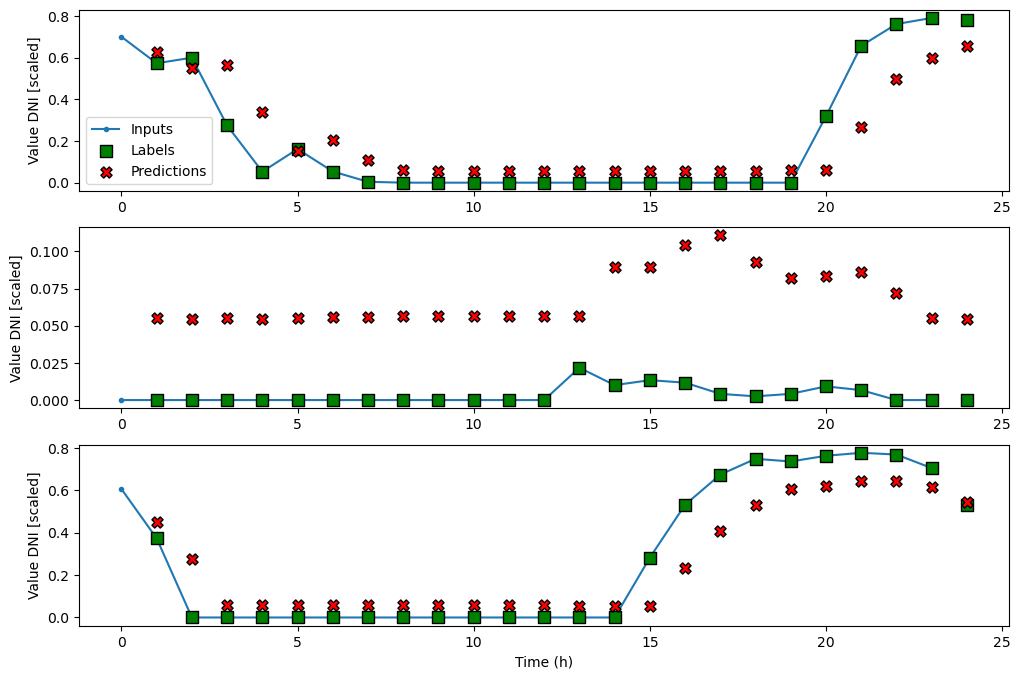

In [70]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


linear = Sequential([
 Dense(units=1)
])

history = compile_and_fit(linear, six_step_window)
val_performance['Linear'] = linear.evaluate(six_step_window.val)
performance['Linear'] = linear.evaluate(six_step_window.test, verbose=0)

wide_window.plot(linear)

In [71]:
print(performance['Linear'])

[0.04809977486729622, 0.21931666135787964]


In [29]:
mo_linear = Sequential([
 Dense(units=2) 
])
history = compile_and_fit(mo_linear, mo_single_step_window)
mo_val_performance['Linear'] = mo_linear.evaluate(mo_single_step_window.val)
mo_performance['Linear'] = mo_linear.evaluate(mo_single_step_window.test, verbose=0)


NameError: name 'mo_single_step_window' is not defined

In [238]:
print(mo_val_performance['Linear'])

[0.013971282169222832, 0.07431985437870026]


## LSTM model

In [95]:
# index0:GHI index1:DNI
train_df = pd.read_csv('../code/train.csv', index_col=0)
val_df = pd.read_csv('../code/val.csv', index_col=0)
test_df = pd.read_csv('../code/test.csv', index_col=0)

In [149]:
from tensorflow.keras.layers import LSTM

lstm_model = Sequential([
 LSTM(32, return_sequences=True), 
 Dense(units=1)
])

history = compile_and_fit(lstm_model, six_step_window)
val_performance = {}
performance = {}
val_performance['LSTM'] = lstm_model.evaluate(six_step_window.val)
performance['LSTM'] = lstm_model.evaluate(six_step_window.test, verbose=0)


Epoch 1/50
822/822 [==============================] - 4s 3ms/step - loss: 0.0507 - root_mean_squared_error: 0.2252 - val_loss: 0.0471 - val_root_mean_squared_error: 0.2170
Epoch 2/50
822/822 [==============================] - 2s 2ms/step - loss: 0.0439 - root_mean_squared_error: 0.2095 - val_loss: 0.0446 - val_root_mean_squared_error: 0.2112
Epoch 3/50
822/822 [==============================] - 2s 2ms/step - loss: 0.0421 - root_mean_squared_error: 0.2051 - val_loss: 0.0429 - val_root_mean_squared_error: 0.2072
Epoch 4/50
822/822 [==============================] - 2s 2ms/step - loss: 0.0412 - root_mean_squared_error: 0.2029 - val_loss: 0.0421 - val_root_mean_squared_error: 0.2051
Epoch 5/50
822/822 [==============================] - 2s 2ms/step - loss: 0.0406 - root_mean_squared_error: 0.2015 - val_loss: 0.0414 - val_root_mean_squared_error: 0.2034
Epoch 6/50
822/822 [==============================] - 2s 2ms/step - loss: 0.0401 - root_mean_squared_error: 0.2002 - val_loss: 0.0416 - val_

In [150]:
print(val_performance['LSTM'])

[0.0331512913107872, 0.1820749193429947]


In [151]:
 print(performance['LSTM'])

[0.032808102667331696, 0.1811300665140152]


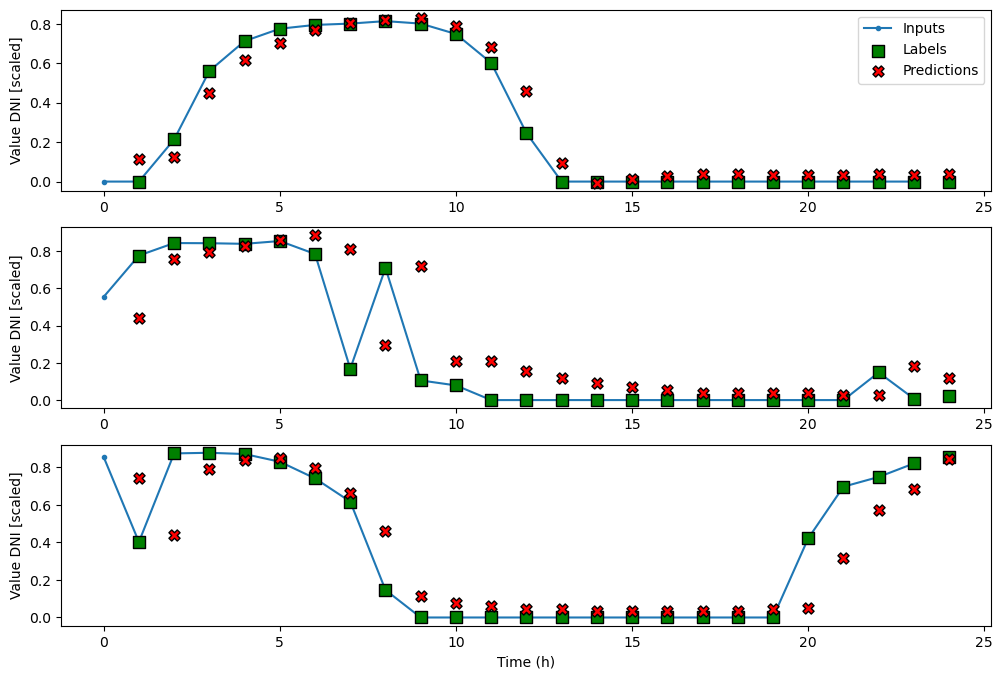

In [152]:
wide_window.plot(lstm_model)

## LSTM+Dense multi output

In [195]:
mo_wide_window = DataWindow(input_width=24, label_width=24, shift=1, label_columns=['Value DNI','Value DNI'])

In [196]:
mo_lstm_model = Sequential([
 LSTM(32, return_sequences=True),Dense(units = 2) 
])

history = compile_and_fit(mo_lstm_model, mo_wide_window)
mo_val_performance = {}
mo_performance = {}
mo_val_performance['LSTM'] = mo_lstm_model.evaluate(mo_wide_window.val)
mo_performance['LSTM'] = mo_lstm_model.evaluate(mo_wide_window.test, verbose=0)

Epoch 1/50
2739/2739 [==============================] - 20s 7ms/step - loss: 0.0113 - mean_absolute_error: 0.0618 - val_loss: 0.0074 - val_mean_absolute_error: 0.0459
Epoch 2/50
2739/2739 [==============================] - 19s 7ms/step - loss: 0.0064 - mean_absolute_error: 0.0431 - val_loss: 0.0068 - val_mean_absolute_error: 0.0426
Epoch 3/50
2739/2739 [==============================] - 18s 6ms/step - loss: 0.0060 - mean_absolute_error: 0.0408 - val_loss: 0.0065 - val_mean_absolute_error: 0.0419
Epoch 4/50
2739/2739 [==============================] - 17s 6ms/step - loss: 0.0058 - mean_absolute_error: 0.0397 - val_loss: 0.0063 - val_mean_absolute_error: 0.0390
Epoch 5/50
2739/2739 [==============================] - 17s 6ms/step - loss: 0.0057 - mean_absolute_error: 0.0389 - val_loss: 0.0061 - val_mean_absolute_error: 0.0399
Epoch 6/50
2739/2739 [==============================] - 17s 6ms/step - loss: 0.0055 - mean_absolute_error: 0.0382 - val_loss: 0.0060 - val_mean_absolute_error: 0.039

In [199]:
print(mo_performance['LSTM'])

[0.005227192305028439, 0.035584669560194016]


## CNN model

In [66]:
train_df.head()

,Value GHI,Value DNI,wind speed
Time,,,
2011-01-01 00:00:00,0.809524,0.839331,0.441737
2011-01-01 01:00:00,0.889724,0.833473,0.134692
2011-01-01 02:00:00,0.909774,0.811715,0.134692
2011-01-01 03:00:00,0.888889,0.838494,0.057599
2011-01-01 04:00:00,0.807853,0.810042,0.156845


In [67]:
KERNEL_WIDTH = 3
conv_window = DataWindow(input_width=KERNEL_WIDTH, label_width=1, shift=1, label_columns=['Value DNI']) 

In [68]:
LABEL_WIDTH = 24
INPUT_WIDTH = LABEL_WIDTH + KERNEL_WIDTH - 1 
wide_conv_window = DataWindow(input_width=INPUT_WIDTH, label_width=LABEL_WIDTH, shift=1, label_columns=['Value DNI'])

In [72]:
from tensorflow.keras.layers import Conv1D

cnn_model = Sequential([
 Conv1D(filters=32, 
 kernel_size=(KERNEL_WIDTH,), 
 activation='relu'),
 Dense(units=32, activation='relu'),
 Dense(units=1)
])

history = compile_and_fit(cnn_model, conv_window)
val_performance = {}
performance = {}
val_performance['CNN'] = cnn_model.evaluate(conv_window.val)
performance['CNN'] = cnn_model.evaluate(conv_window.test, verbose=0)

Epoch 1/50
822/822 [==============================] - 2s 2ms/step - loss: 0.0160 - root_mean_squared_error: 0.1264 - val_loss: 0.0137 - val_root_mean_squared_error: 0.1172
Epoch 2/50
822/822 [==============================] - 1s 1ms/step - loss: 0.0114 - root_mean_squared_error: 0.1070 - val_loss: 0.0102 - val_root_mean_squared_error: 0.1009
Epoch 3/50
822/822 [==============================] - 1s 1ms/step - loss: 0.0110 - root_mean_squared_error: 0.1048 - val_loss: 0.0102 - val_root_mean_squared_error: 0.1010
Epoch 4/50
822/822 [==============================] - 1s 1ms/step - loss: 0.0108 - root_mean_squared_error: 0.1039 - val_loss: 0.0100 - val_root_mean_squared_error: 0.1001
Epoch 5/50
822/822 [==============================] - 1s 2ms/step - loss: 0.0107 - root_mean_squared_error: 0.1032 - val_loss: 0.0103 - val_root_mean_squared_error: 0.1016
Epoch 6/50
822/822 [==============================] - 1s 2ms/step - loss: 0.0105 - root_mean_squared_error: 0.1024 - val_loss: 0.0094 - val_

In [156]:
print(val_performance['CNN'])

[0.008954987861216068, 0.09463080018758774]


In [157]:
print(performance['CNN'])

[0.009285613894462585, 0.09636189043521881]


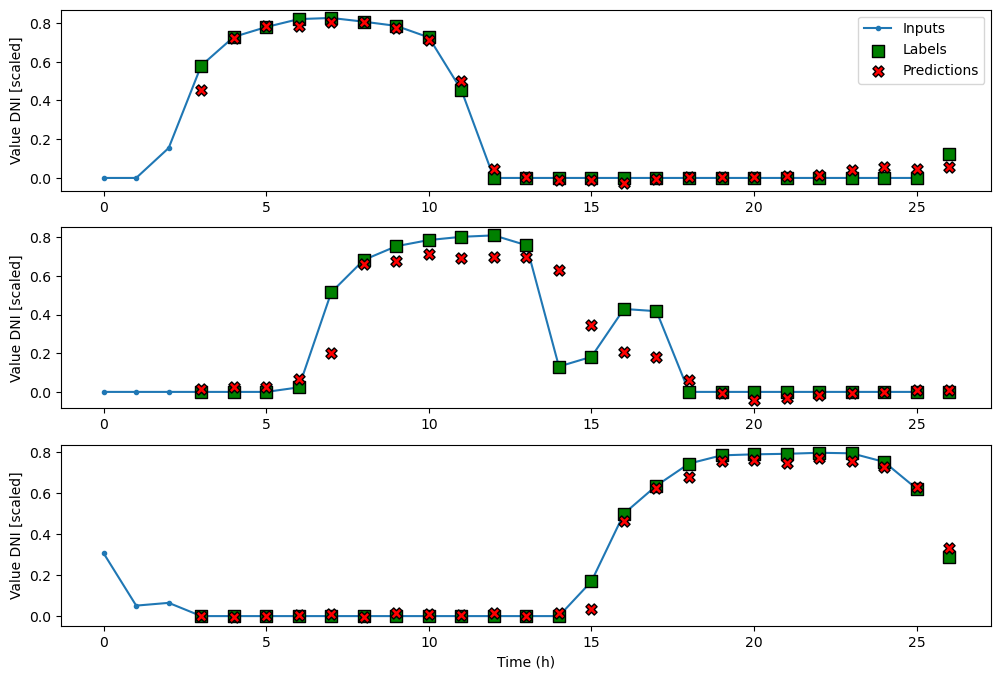

In [158]:
wide_conv_window.plot(cnn_model)

In [74]:
test_df

,Value GHI,Value DNI,wind speed
Time,,,
2015-01-01 00:00:00,0.817043,0.880335,0.214444
2015-01-01 01:00:00,0.902256,0.883682,0.083296
2015-01-01 02:00:00,0.924812,0.870293,0.134692
2015-01-01 03:00:00,0.895572,0.877824,0.134692
2015-01-01 04:00:00,0.814536,0.884519,0.166593
...,...,...,...
2015-12-31 19:00:00,0.000000,0.000000,0.312805
2015-12-31 20:00:00,0.062657,0.012552,0.538768
2015-12-31 21:00:00,0.065998,0.001674,0.296854


In [73]:
ts_predictions = cnn_model.predict(test_df)

ValueError: in user code:

    File "C:\Users\zhu\anaconda3\Lib\site-packages\keras\src\engine\training.py", line 2440, in predict_function  *
        return step_function(self, iterator)
    File "C:\Users\zhu\anaconda3\Lib\site-packages\keras\src\engine\training.py", line 2425, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\zhu\anaconda3\Lib\site-packages\keras\src\engine\training.py", line 2413, in run_step  **
        outputs = model.predict_step(data)
    File "C:\Users\zhu\anaconda3\Lib\site-packages\keras\src\engine\training.py", line 2381, in predict_step
        return self(x, training=False)
    File "C:\Users\zhu\anaconda3\Lib\site-packages\keras\src\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\zhu\anaconda3\Lib\site-packages\keras\src\engine\input_spec.py", line 253, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer 'sequential_1' (type Sequential).
    
    Input 0 of layer "conv1d" is incompatible with the layer: expected min_ndim=3, found ndim=2. Full shape received: (None, 3)
    
    Call arguments received by layer 'sequential_1' (type Sequential):
      • inputs=tf.Tensor(shape=(None, 3), dtype=float64)
      • training=False
      • mask=None


## CNN+LSTM

In [159]:
cnn_lstm_model = Sequential([
 Conv1D(filters=32,
 kernel_size=(KERNEL_WIDTH,),
 activation='relu'),
 LSTM(32, return_sequences=True),
 LSTM(32, return_sequences=True),
 Dense(1)
]) 

In [160]:
history = compile_and_fit(cnn_lstm_model, conv_window)
val_performance['CNN + LSTM'] = cnn_lstm_model.evaluate(conv_window.val)
performance['CNN + LSTM'] = cnn_lstm_model.evaluate(conv_window.test, verbose=0)

Epoch 1/50
822/822 [==============================] - 6s 3ms/step - loss: 0.0224 - root_mean_squared_error: 0.1496 - val_loss: 0.0130 - val_root_mean_squared_error: 0.1141
Epoch 2/50
822/822 [==============================] - 2s 3ms/step - loss: 0.0126 - root_mean_squared_error: 0.1124 - val_loss: 0.0107 - val_root_mean_squared_error: 0.1034
Epoch 3/50
822/822 [==============================] - 2s 3ms/step - loss: 0.0117 - root_mean_squared_error: 0.1081 - val_loss: 0.0118 - val_root_mean_squared_error: 0.1088
Epoch 4/50
822/822 [==============================] - 2s 3ms/step - loss: 0.0112 - root_mean_squared_error: 0.1058 - val_loss: 0.0131 - val_root_mean_squared_error: 0.1146
Epoch 5/50
822/822 [==============================] - 2s 3ms/step - loss: 0.0109 - root_mean_squared_error: 0.1045 - val_loss: 0.0098 - val_root_mean_squared_error: 0.0989
Epoch 6/50
822/822 [==============================] - 2s 3ms/step - loss: 0.0108 - root_mean_squared_error: 0.1039 - val_loss: 0.0098 - val_

In [161]:
print(val_performance['CNN + LSTM'])

[0.009954458102583885, 0.09977202862501144]


In [162]:
print(performance['CNN + LSTM'])

[0.01041064877063036, 0.10203258693218231]


## CNN+LSTM multi output

In [212]:
KERNEL_WIDTH = 3
LABEL_WIDTH = 24
INPUT_WIDTH = LABEL_WIDTH + KERNEL_WIDTH - 1
wide_mo_conv_window = DataWindow(input_width=INPUT_WIDTH, label_width=24, shift=1, label_columns=['Value DNI', 'Value DNI'])


In [233]:
mo_cnn_model = Sequential([
 Conv1D(filters=32, kernel_size=(KERNEL_WIDTH,), activation='relu'),
 Dense(units=32, activation='relu'),
 Dense(units=2)
])
history = compile_and_fit(mo_cnn_model, wide_mo_conv_window)
mo_val_performance = {}
mo_performance = {}
mo_val_performance['CNN'] = mo_cnn_model.evaluate(wide_mo_conv_window.val)
mo_performance['CNN'] = mo_cnn_model.evaluate(wide_mo_conv_window.test, verbose=0)


Epoch 1/50
2739/2739 [==============================] - 6s 2ms/step - loss: 0.0070 - mean_absolute_error: 0.0442 - val_loss: 0.0062 - val_mean_absolute_error: 0.0376
Epoch 2/50
2739/2739 [==============================] - 5s 2ms/step - loss: 0.0056 - mean_absolute_error: 0.0380 - val_loss: 0.0060 - val_mean_absolute_error: 0.0376
Epoch 3/50
2739/2739 [==============================] - 5s 2ms/step - loss: 0.0055 - mean_absolute_error: 0.0373 - val_loss: 0.0061 - val_mean_absolute_error: 0.0416
Epoch 4/50
2739/2739 [==============================] - 5s 2ms/step - loss: 0.0054 - mean_absolute_error: 0.0371 - val_loss: 0.0059 - val_mean_absolute_error: 0.0383
Epoch 5/50
2739/2739 [==============================] - 5s 2ms/step - loss: 0.0054 - mean_absolute_error: 0.0369 - val_loss: 0.0059 - val_mean_absolute_error: 0.0360
Epoch 6/50
2739/2739 [==============================] - 5s 2ms/step - loss: 0.0053 - mean_absolute_error: 0.0368 - val_loss: 0.0058 - val_mean_absolute_error: 0.0355
Epoc

In [224]:
mo_cnn_lstm_model = Sequential([
 Conv1D(filters=32, kernel_size=(KERNEL_WIDTH,), activation='relu'),
 LSTM(32, return_sequences=True),
 Dense(units=2)
])
history = compile_and_fit(mo_cnn_lstm_model, wide_mo_conv_window)
mo_val_performance['CNN + LSTM'] = mo_cnn_model.evaluate(wide_mo_conv_window.val)
mo_performance['CNN + LSTM'] = mo_cnn_model.evaluate(wide_mo_conv_window.test, verbose=0)

Epoch 1/50
2739/2739 [==============================] - 24s 7ms/step - loss: 0.0076 - mean_absolute_error: 0.0472 - val_loss: 0.0060 - val_mean_absolute_error: 0.0382
Epoch 2/50
2739/2739 [==============================] - 20s 7ms/step - loss: 0.0052 - mean_absolute_error: 0.0368 - val_loss: 0.0056 - val_mean_absolute_error: 0.0365
Epoch 3/50
2739/2739 [==============================] - 20s 7ms/step - loss: 0.0050 - mean_absolute_error: 0.0357 - val_loss: 0.0055 - val_mean_absolute_error: 0.0355
Epoch 4/50
2739/2739 [==============================] - 20s 7ms/step - loss: 0.0049 - mean_absolute_error: 0.0351 - val_loss: 0.0055 - val_mean_absolute_error: 0.0347
Epoch 5/50
2739/2739 [==============================] - 20s 7ms/step - loss: 0.0049 - mean_absolute_error: 0.0346 - val_loss: 0.0054 - val_mean_absolute_error: 0.0350
Epoch 6/50
2739/2739 [==============================] - 20s 7ms/step - loss: 0.0048 - mean_absolute_error: 0.0344 - val_loss: 0.0053 - val_mean_absolute_error: 0.033

In [225]:
print(mo_performance['CNN + LSTM'])

[0.005255801137536764, 0.0317499153316021]


## Concatenated Model

In [3]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, LSTM, Dense, Concatenate, Flatten
from tensorflow.keras.models import Model

# 定义输入向量v的形状
input_shape_v = (4, 1)

# 创建输入层
input_v = Input(shape=input_shape_v)

# 创建处理v的RNN模型
rnn_model = Input(shape=(1, 1), dtype='float32')
rnn_output = LSTM(50)(rnn_model)  # 使用LSTM层
rnn_output = Dense(20, activation='relu')(rnn_output)  # 一个全连接层

# 创建处理v[0]的1D卷积模型
conv_model = Input(shape=(4, 1), dtype='float32')  # 假设v[0]是单时间步的1D数据
conv_output = Conv1D(32, kernel_size=3, activation='relu')(conv_model)
conv_output = MaxPooling1D(pool_size=2)(conv_output)
conv_output = Flatten()(conv_output)  # 展平1D卷积层的输出

# 合并两个模型的输出
concatenated = Concatenate()([rnn_output, conv_output])

# 添加一个全连接层来综合两个模型的输出
combined_output = Dense(10, activation='softmax')(concatenated)  # 假设有10个输出类别

# 定义模型
model = Model(inputs=[rnn_model, conv_model], outputs=combined_output)

# 编译模型
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# 显示模型概要
model.summary()


Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_9 (InputLayer)        [(None, 4, 1)]               0         []                            
                                                                                                  
 input_8 (InputLayer)        [(None, 1, 1)]               0         []                            
                                                                                                  
 conv1d_2 (Conv1D)           (None, 2, 32)                128       ['input_9[0][0]']             
                                                                                                  
 lstm_2 (LSTM)               (None, 50)                   10400     ['input_8[0][0]']             
                                                                                           

## Visualization

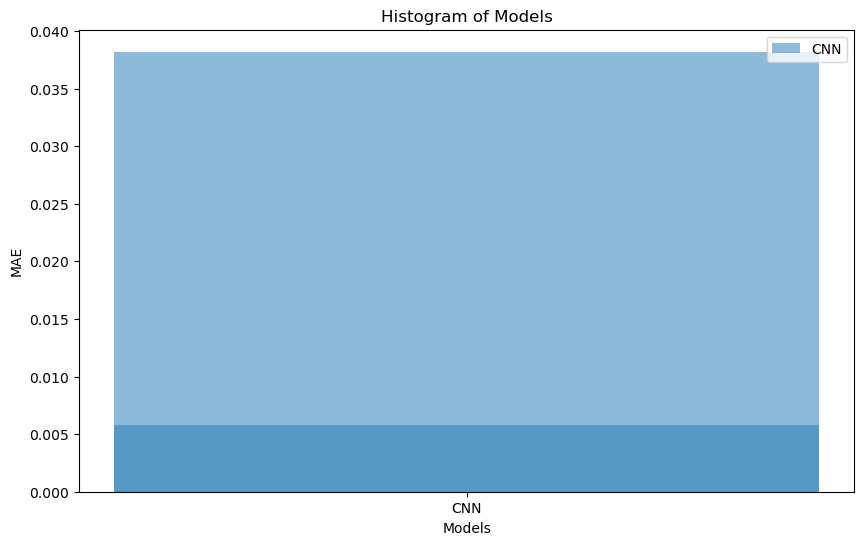

In [234]:
import matplotlib.pyplot as plt
import numpy as np


plt.figure(figsize=(10, 6))
for key, values in mo_val_performance.items():
    plt.bar([key]*len(values), values, alpha=0.5, label=key)
plt.xlabel('Models')
plt.ylabel('MAE')
plt.title('Histogram of Models')
plt.legend()
plt.show()





In [235]:
mo_val_performance

{'CNN': [0.005798777565360069, 0.03820310905575752]}